<a href="https://colab.research.google.com/github/HeatherAnnFoster/Spanish-Wine-Project/blob/main/Spanish_Wine_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score,ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline

df = pd.read_csv('/content/Project 2.A.csv')
df.head()

#**Source of Data**

Kaggle.com

#**Brief Description of the Data**

Context

This dataset is related to red variants of spanish wines. The dataset describes several popularity and description metrics their effect on it's quality. The datasets can be used for classification or regression tasks. The classes are ordered and not balanced (i.e. the quality goes from almost 5 to 4 points). The task is to predict either the quality of wine or the prices using the given data.

Content

The dataset contains 7500 different types of red wines from Spain with 11 features that describe their price, rating, and even some flavor description. The was collected by me using web scraping from different sources (from wine specialized pages to supermarkets).

#**Target**

There are two possible targets for this dataset.  I will be looking at the quality of the wine of the Rating column for my target.

#**What does one row represent? (A person? A business? An event? A product?)**

The Winery, Year, Country, and Region represents the business or winery that the wine was produced in.  The Wine, Type, Body, and Acidity represents the wine itself or the product.  The Wine column also represents a product or wine.  The Rating, Number of Reviews, and Price represent the sellability of the wine which would also be tied to the business aspect of the dataset.

#**Is this a classification or regression problem?**

Because the target is from the rating column, it is an ordinal column.  The values are 0 to 5, set up as 5 being the best and 0 being the worst.  For this column, I would use an ordinal transformer while I am analyzing this dataset.  It is classification model.

#**How many features does the data have?**

There are 11 features.

In [147]:
df.shape

(7500, 11)

#**How many rows are in the dataset?**

There are 7,500 rows.

#**What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?**

I foresee duplicates, missing data and needing multiple preprocessors for various models on different columns.  I also think I will have multiple visualizations to see and show what different columns would look like when compared to others.  This might help determine what I need to tune later.

In [ ]:
df.info()

In [ ]:
df.dtypes

#Duplicated Values
There are 5,452 duplicated rows.  They will be dropped within the next few boxes.

In [150]:
df.duplicated().sum()

5452

In [ ]:
df.loc[df.duplicated()]

The duplicates are dropped now.

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

In [ ]:
df.describe(include = 'number')

In [154]:
df.shape

(2048, 11)

#Inconsistent Data

Below is a look at all the values of the data.  There are no inconsistencies of categorical data in this set.

In [ ]:
df.value_counts()

In [ ]:
df['wine'].value_counts()
print(df['wine'].unique())

In [157]:
# change this column to something like is_red ?
# str.contains('red')  --> is_red 1

In [ ]:
df['year'].value_counts()
print(df['year'].unique())

In [159]:
df['rating'].value_counts()
print(df['rating'].unique())

[4.9 4.8 4.7 4.6 4.5 4.4 4.3 4.2]


In [ ]:
df['num_reviews'].value_counts()
print(df['num_reviews'].unique())

#Dropped Column
Because this column is telling us that all the wine was made in Spain, we can drop it and not have it affect our dataset.

In [161]:
df['country'].value_counts()

Espana    2048
Name: country, dtype: int64

In [162]:
df = df.drop(columns = 'country')

**Because this data is 1970, 10 % of it would need ot be around 200 unique values.  If the data is looked at, the most frequently used winery is not used 10% of the time.  Therefore, there is no pattern or need to keep this column.  So, it will be dropped.**

In [163]:
df = df.drop(columns = 'winery')

In [ ]:
df['region'].value_counts()
print(df['region'].value_counts())

In [165]:
df['price'].value_counts()
print(df['price'].unique())

[995.   313.5  324.95 ...  16.76  24.45  31.63]


In [ ]:
df['type'].value_counts()
print(df['type'].unique())

In [167]:
df['body'].value_counts()
print(df['body'].unique())

[ 5.  4.  3. nan  2.]


In [168]:
df['acidity'].value_counts()
print(df['acidity'].unique())

[ 3.  2.  1. nan]


In [ ]:
df.info()

#Missing Values

I will be dropping the missing values in the year column and in the type column.  The reason I am dropping the year and type is because it is less than 5% of the total dataset so it won't affect the data too much.  Now we have a dataset with values that are dropped.

In [ ]:
df.isna().sum()

In [ ]:
df.dropna(subset= ['year'], inplace=True)
df.dropna(subset= ['type'], inplace=True)
df.isna().sum()

#Univariate visuals for the target and all features.
Identified outliers.

Acidity and Body have some values that are not as close to each other as other values, but these are not outliers.  There aren't any here.

In [ ]:
df['rating'].hist()
ax=df['rating'].hist()
ax=df['rating'].hist(bins = 10, edgecolor = 'black')
ax.set_title('Ratings')
ax. set_xlabel("rating")
ax.set_ylabel('rating')

In [ ]:
df['num_reviews'].hist()
ax=df['num_reviews'].hist()
ax=df['num_reviews'].hist(bins = 20, edgecolor = 'black')
ax.set_title('Reveiws')
ax. set_xlabel("num_reviews", rotation = 90)
ax.set_ylabel('num_reveiws')

In [ ]:
df['price'].hist()
ax=df['price'].hist()
ax=df['price'].hist(bins = 20, edgecolor = 'black')
ax.set_title('Price')
ax. set_xlabel("price", rotation = 90)
ax.set_ylabel('price')

In [ ]:
df['body'].hist()
ax=df['body'].hist(bins = 20, edgecolor = 'black')
ax.set_title('Body')
ax. set_xlabel("body", rotation = 90)
ax.set_ylabel('body')

In [ ]:
df['acidity'].hist()
ax=df['acidity'].hist(bins = 20, edgecolor = 'black')
ax.set_title('Acidity')
ax. set_xlabel("acidity", rotation = 90)
ax.set_ylabel('acidity')

**With all this information, someone like me, who does not drink wine, can use this to determine what their likely wine of choice would be.  They would be able to answer questions like, "How much acidity do I like in my wine?"  Or "How fully bodied do I want my wine to be?"  They can also try different acidities with bodies and match that to the rating of the wine that they are trying.  To start, I would try a highly rated wine with a low acidity, simply because I do not like the strong taste of wine, then experiement from there.**

In [190]:
#X= df['wine']
#y = df['year']
#fig,ax = plt.subplots()
#ax.scatter(X, y)
#plt.figure(figsize=(12,10))

In [178]:
#df['year'].hist()
#ax=df['year'].hist()
#ax=df['year'].hist(bins = 20, edgecolor = 'black')
#ax.set_title('year')
#ax. set_xlabel("year", rotation = 90)
#ax.set_ylabel('year')
#plt.figure(figsize=(30,28))

In [179]:
#sns.lineplot(data = df, x = 'winery', y = 'region', errorbar=None, marker = 'o')
#plt.figure(figsize=(50,48))

In [180]:
#df['type'].hist()
#ax=df['type'].hist(bins = 20, edgecolor = 'black')
#ax.set_title('Type')
#ax. set_xlabel("type", rotation = 90)
#ax.set_ylabel('type')

In [ ]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (12, 10))
ax = sns.heatmap(corr, cmap= 'Blues', annot = True)

**This correlation map shows a moderate correlation between price and rating at 0.51 or 51%.  That makes sense because the rating would positively impact the sales of the wines.  It would also makes sense to think that if the rating of the wine is higher, the price of it would be higher as well.**

**Another correlation is between body and rating.  This correlation makes sense as well, even though it is not as strong as the first one.  It is only 0.21 or 21%.  If the body of the wine is pleasing or better than another body, it would make sense that the rating of the wine would go up as well.  Perhaps there was a section of the 'rating' survey that was tailored just for body, so that the customers could rate the body on its own merits.**

In [ ]:
sns.pairplot(df);

**The graphs of num reviews and price mirrors the correlation graph of price and rating in that the higher price is positively impacted by the higher review.  That makes a lot of sense too.  As the quality of the wine increases, the reviews increase and the price can be increased as well.  This can lead to the wine maker creating limited wines that are rated higher and priced accordingly.**

**A graph that was interesting to me, because I don't drink wine, was the body and acidity graph.  As the body or fullness of the wine increased, the acidity increased.  This leads me to wonder if the taste of the wine becomes richer based on the ratio of body to acidity.  That would be something important to know for someone who doesn't drink wine very much.  That may also be a question that a new customer would have to a wine connoisseur in order to determine if they want to try that wine or not.  It would give a wine seller an opportunity to give a new customer a reason to buy different bodies or acidic properites of wine in order to find the new customer's opinon on which wine they liked the best.**

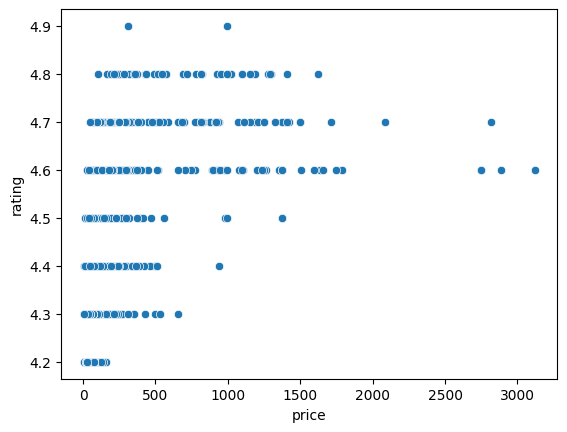

In [199]:
ax = sns.scatterplot(data=df, x = 'price', y = 'rating')

<Axes: xlabel='body', ylabel='acidity'>

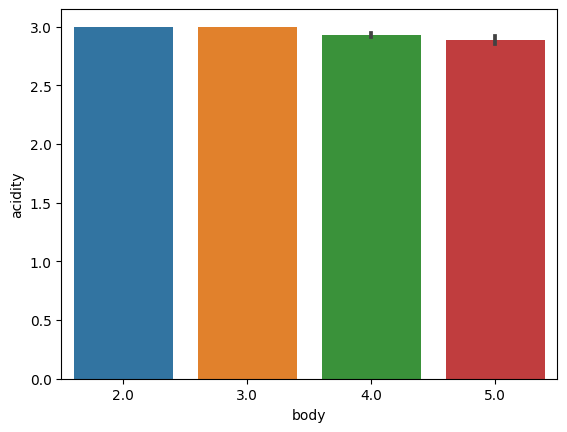

In [202]:
sns.barplot(data=df, x='body', y = 'acidity')

In [ ]:
df.info()

In [186]:
#Define features (X) and target (y)
y = df['rating']
X = df.drop(columns='rating')

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [187]:
#Instantiate the column selectors
num_selector = make_column_selector(dtype_include = 'number')
cat_selector = make_column_selector(dtype_include = 'object')

In [193]:
#Instantiate the transformers
scaler = StandardScaler()
log_reg = LogisticRegression()

In [ ]:
##Create Tuples
number_tuple = (scaler, num_selector)
category_tuple = (log_reg, cat_selector)

## Create Preprocessor
preprocessor = make_column_transformer (number_tuple,
                                        category_tuple,
                                        remainder = 'drop')

## Create an instance of the model
log_reg = LogisticRegression()
##Create pipeline
log_reg_pipe = make_pipeline(preprocessor, log_reg)
##Fit the model
log_reg_pipe.fit(X_train, y_train)